In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#dataset from: https://ourworldindata.org/coronavirus-source-data
df = pd.read_csv("full_data.csv")
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.drop('date', axis=1)
df.tail()

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2020-03-10,World,4119.0,201.0,113702,4012.0
2020-03-11,World,4611.0,275.0,118319,4292.0
2020-03-12,World,6936.0,317.0,125260,4613.0
2020-03-13,World,7488.0,338.0,132758,4956.0
2020-03-14,World,9766.0,434.0,142539,5393.0


In [44]:
world_df = df[df["location"] == "World"]
china_df = df[df["location"] == "China"]
italy_df = df[df["location"] == "Italy"]

## Análise China

### Novos casos diários

Média de novos casos:  1523.4528301886792
Desvio padrão de novos casos:  2760.6372910145064


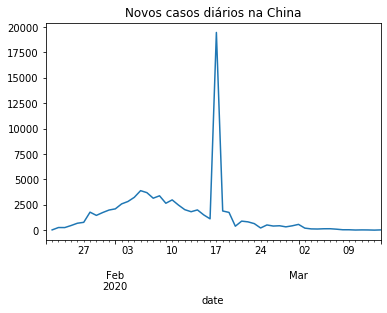

In [57]:
china_df['new_cases'].plot()
plt.title("Novos casos diários na China")
print("Média de novos casos: ", china_df['new_cases'].mean())
print("Desvio padrão de novos casos: ", china_df['new_cases'].std())

O crescimento acentuado, no meio do mês de fevereiro, ocorre depois de autoridades locais terem anunciado uma mudança na forma de diagnóstico do casos de COVID-19. No comunicado, a comissão de saúde de Hubei disse que passaria a incluir casos diagnosticados clinicamente. Isso significa que imagens de pulmão em pacientes suspeitos passam a ser consideradas suficientes para confirmar o vírus, no ligar dos exames de DNA. Isso representa a antecipação no tratamento dos pacientes, que ajudou o país a atacar a doença como pode-se observar a unifirmazação no número de novos casos após o pico. Mas vale ressaltar que essa não foi a única medida que diminui o número de casos novos.


fonte: https://saude.estadao.com.br/noticias/geral,china-muda-metodo-de-diagnostico-e-mortes-pelo-coronavirus-chegam-a-1350,70003195840

### Fator de Crescimento

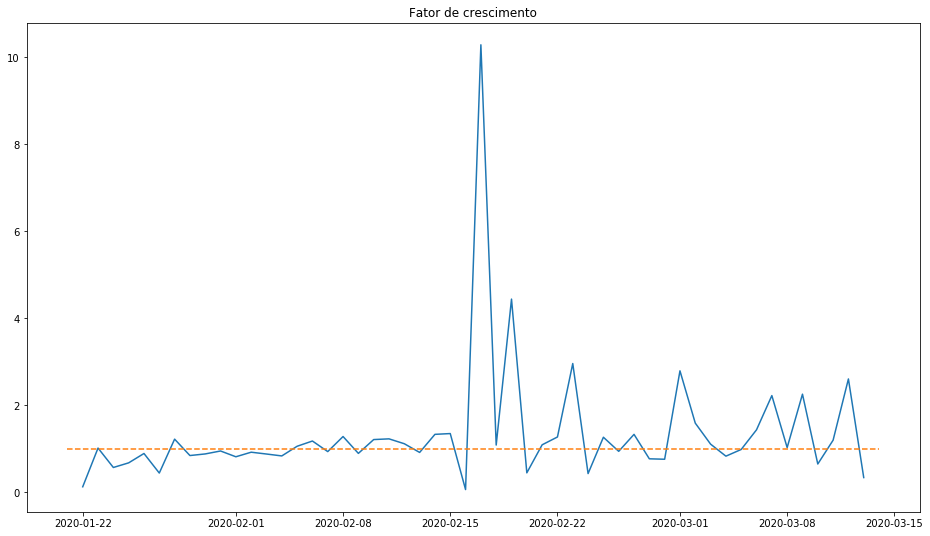

In [89]:
plt.figure(figsize=(16,9))

china_df["growth_factor"] = china_df['new_cases'] / china_df['new_cases'].shift(-1)
plt.plot(china_df["growth_factor"])

y = pd.DataFrame(np.ones(len(china_df)))
y.index=china_df.index
plt.plot(y,ls='--')

plt.title("Fator de crescimento")
plt.show()

O fator de crescimento é uma medida que expressa o quanto uma feature se multiplica ao longo do tempo. A fórmula para o calculo diário é: Novos casos / Novos casos do dia anterior.

Um fator de crescimento maior que 1, indica um crescimento exponencial de casos de COVID-19. Já um fator entre 0 e 1 é um sinal de declínio, caracterizado por curva logaritmica.

Analisando os últimos fatores de crescimento, não há evidências de um declínio. Mas analisando o gráfico de casos totais na China (Gráfico abaixo) claramente há uma tendência de diminuição de novos casos. Tal fato provavelmente ocorreu por causa das medidas adotadas pela China como: barreiras físicas, suspensão de atividades não essenciais, paralisação de insdustrias e entre outras. Essa medidas acabaram saturando o número de pessoas expostas ao virus.


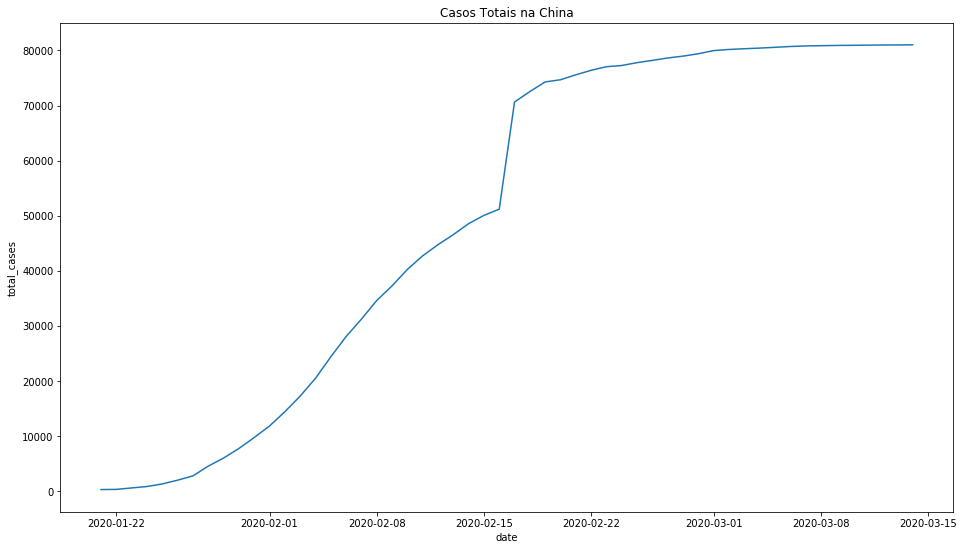

In [92]:
plt.figure(figsize=(16,9))
sns.lineplot(x=china_df.index, y='total_cases', data=china_df)
plt.title("Casos Totais na China")
plt.show()

### Distribuição dos casos mundialmente

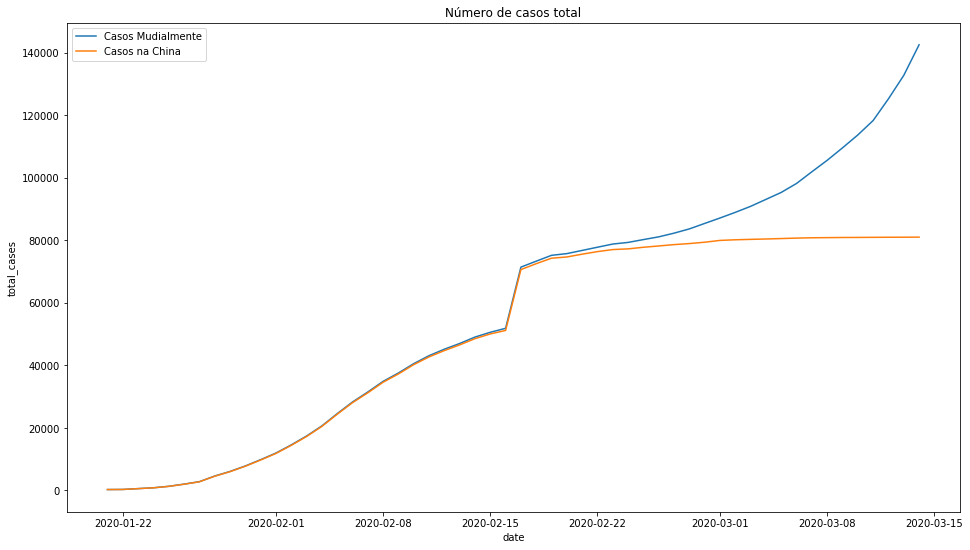

In [96]:
plt.figure(figsize=(16,9))
sns.lineplot(x=world_df.index, y='total_cases', data=world_df, label = "Casos Mudialmente")
sns.lineplot(x=china_df.index, y='total_cases', data=china_df, label = "Casos na China")
plt.title("Número de casos total")
plt.show()

Esse gráfico demonstra a transferencia de predominancia de casos na china para o resto do mundo.

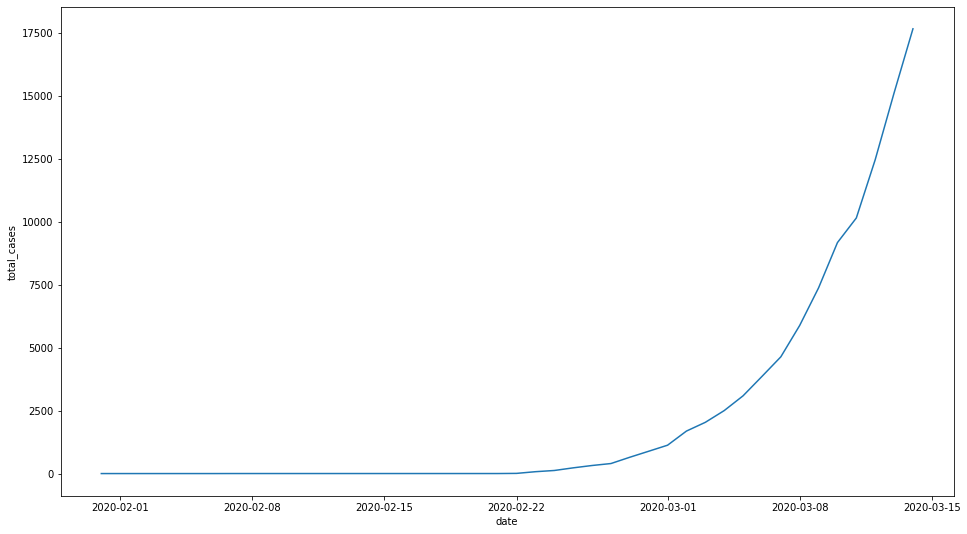

In [48]:
plt.figure(figsize=(16,9))
sns.lineplot(x=italy_df.index, y='total_cases', data=italy_df)
plt.show()